In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("bankdataset.csv")

In [3]:
index=pd.Index(range(1,len(df)+1))

In [4]:
df.index=index

In [5]:
df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
1      2733                  1   Not Graduate            Yes        5000000   
2      2608                  4   Not Graduate             No        5400000   
3      1654                  3   Not Graduate            Yes        6400000   
4      3265                  5   Not Graduate            Yes         800000   
5      1034                  3       Graduate             No         600000   
6      3469                  5       Graduate            Yes        4200000   
7       706                  1   Not Graduate             No        2800000   
8      2600                  0       Graduate            Yes        2300000   
9      2136                  0       Graduate            Yes        6400000   
10     2223                  1       Graduate             No        8600000   

     loan_amount   loan_term   cibil_score   residential_assets_value  \
1       16800000           6           711                    6300000   
2       12600000          18           786                     300000   
3       23500000          12           684                   17200000   
4        2100000          12           363                    1200000   
5        1200000           2           752                    1100000   
6        8700000           6           583                    6000000   
7        6700000          12           322                    1900000   
8        4900000          12           409                    3300000   
9       16900000          16           759                   16200000   
10      26700000          10           735                   11800000   

     commercial_assets_value   luxury_assets_value   bank_asset_value  \
1                    7600000              16000000            3200000   
2                    2500000              21000000            6600000   
3                   10300000              25300000            7400000   
4                    1000000               3100000             900000   
5                     500000               2300000             700000   
6                     800000               8500000            2500000   
7                    2000000               8600000            2100000   
8                    2400000               4700000            3200000   
9                    7100000              15200000            3100000   
10                   9100000              20700000           11200000   

    loan_status  
1      Approved  
2      Approved  
3      Approved  
4      Rejected  
5      Approved  
6      Approved  
7      Rejected  
8      Rejected  
9      Approved  
10     Approved

In [6]:
df.shape

(10000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    10000 non-null  int64 
 1    no_of_dependents          10000 non-null  int64 
 2    education                 10000 non-null  object
 3    self_employed             10000 non-null  object
 4    income_annum              10000 non-null  int64 
 5    loan_amount               10000 non-null  int64 
 6    loan_term                 10000 non-null  int64 
 7    cibil_score               10000 non-null  int64 
 8    residential_assets_value  10000 non-null  int64 
 9    commercial_assets_value   10000 non-null  int64 
 10   luxury_assets_value       10000 non-null  int64 
 11   bank_asset_value          10000 non-null  int64 
 12   loan_status               10000 non-null  object
dtypes: int64(10), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  10000.000000       10000.000000   1.000000e+04  1.000000e+04   
mean    2128.919300           2.468900   5.044890e+06  1.512471e+07   
std     1223.080055           1.708954   2.806800e+06  9.116837e+06   
min        1.000000           0.000000   2.000000e+05  3.000000e+05   
25%     1079.750000           1.000000   2.600000e+06  7.600000e+06   
50%     2127.000000           2.000000   5.000000e+06  1.450000e+07   
75%     3188.000000           4.000000   7.500000e+06  2.140000e+07   
max     4269.000000           5.000000   9.900000e+06  3.950000e+07   

          loan_term   cibil_score   residential_assets_value  \
count  10000.000000  10000.000000               1.000000e+04   
mean      10.928600    600.480800               7.402840e+06   
std        5.691585    172.588479               6.472750e+06   
min        2.000000    300.000000              -1.000000e+05   
25%        6.000000    454.000000               2.100000e+06   
50%       10.000000    601.500000               5.600000e+06   
75%       16.000000    750.000000               1.120000e+07   
max       20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              1.000000e+04          1.000000e+04       1.000000e+04  
mean               4.998080e+06          1.507048e+07       4.972790e+06  
std                4.411145e+06          9.119033e+06       3.237111e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.400000e+06          7.500000e+06       2.400000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.700000e+06          2.160000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [9]:
df.drop(['loan_id',' education',' self_employed'],axis=1,inplace=True)

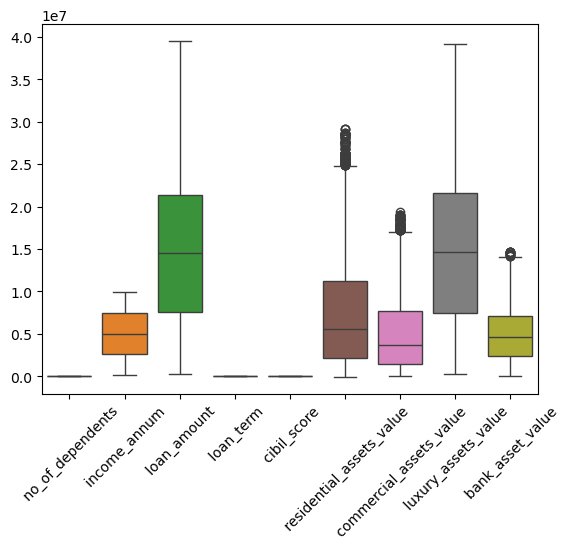

In [10]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [11]:
for i in df:
    if df[i].dtype!='O':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        uf=q3+(1.5*iqr)
        lf=(q1-1.5*iqr)
        out=df[(df[i]>uf)|(df[i]<lf)]
        df.drop(out.index,axis=0,inplace=True)

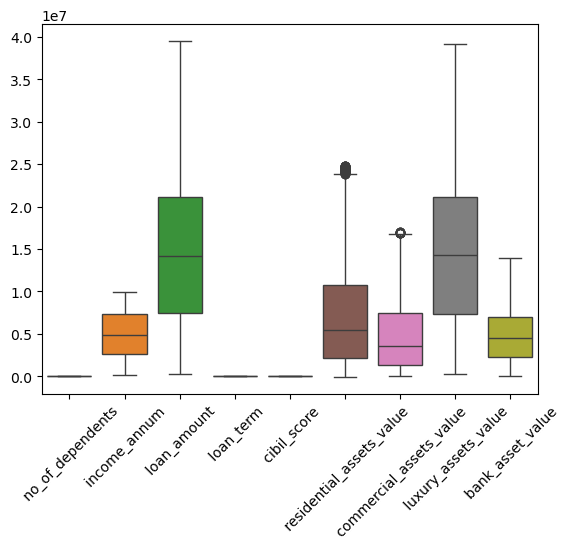

In [12]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [13]:
df.shape

(9779, 10)

In [14]:
df.head(3)

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
1                 1       5000000     16800000          6          711   
2                 4       5400000     12600000         18          786   
3                 3       6400000     23500000         12          684   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
1                   6300000                  7600000             16000000   
2                    300000                  2500000             21000000   
3                  17200000                 10300000             25300000   

   bank_asset_value loan_status  
1           3200000    Approved  
2           6600000    Approved  
3           7400000    Approved

In [15]:
df[df[' loan_amount']==0]

Empty DataFrame
Columns: [ no_of_dependents,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []

In [16]:
x=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

In [18]:
model_list=[AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier(),ExtraTreesClassifier()]

In [19]:
score={}
testlist=[]
trainlist=[]
for i in model_list:
    model=i.fit(xtrain,ytrain)
    y_predtext=model.predict(xtest)
    y_predtrain=model.predict(xtrain)
    test_acc=accuracy_score(ytest,y_predtext)
    testlist.append(test_acc)
    train_acc=accuracy_score(ytrain,y_predtrain)
    trainlist.append(train_acc)

/opt/anaconda3/envs/project2/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [20]:
score['model']=model_list
score['train_score']=trainlist
score['test_score']=testlist
df_score=pd.DataFrame(score)

In [21]:
df_score

model  train_score  test_score
0  (DecisionTreeClassifier(max_depth=1, random_st...     0.979401    0.973074
1  ([DecisionTreeRegressor(criterion='friedman_ms...     0.995471    0.993865
2  (DecisionTreeClassifier(random_state=661686690...     0.999562    0.996592
3  (DecisionTreeClassifier(max_features='sqrt', r...     1.000000    0.997955
4  (ExtraTreeClassifier(random_state=1229200511),...     1.000000    0.995910

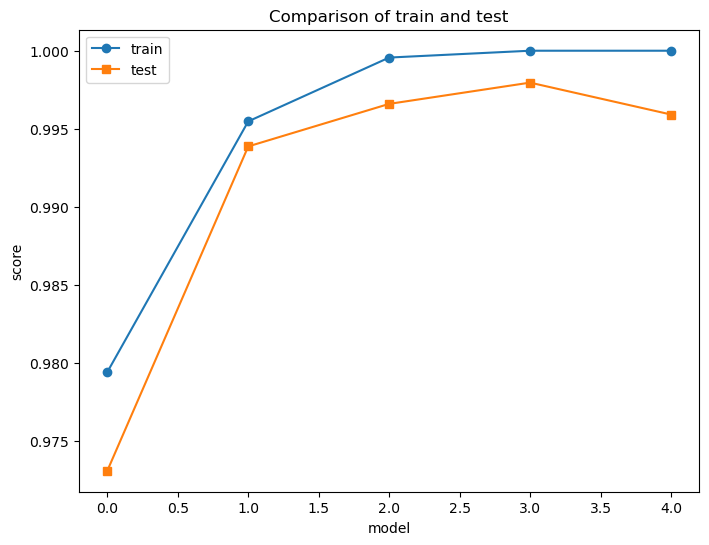

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(df_score['train_score'], label='train', marker='o')
plt.plot(df_score['test_score'], label='test', marker='s')
plt.xlabel('model')
plt.ylabel('score')
plt.title('Comparison of train and test')
plt.legend()
plt.show()

In [23]:
model_list[3]

RandomForestClassifier()

In [24]:
final_model=RandomForestClassifier().fit(xtrain,ytrain)

In [25]:
final_model.predict([[4,5000000,123434242,4,711,630000,76000000,14234234,2341234]])

/opt/anaconda3/envs/project2/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([' Approved'], dtype=object)

In [26]:
import pickle
data={
    "model":final_model
}
with open('bank.model','wb') as my_model:
    pickle.dump(data,my_model)

In [31]:
for i in final_model.predict([[4,5000000,123434242,4,711,630000,76000000,14234234,2341234]]):
    if i==' Approved':
        print('g')
        

g


/opt/anaconda3/envs/project2/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
